In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('D:/Data-Analysis/Mothers Day/dataset/train.csv')

In [3]:
data.keys()

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class'],
      dtype='object')

In [4]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
text = "Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon as I can be. Love you lots xxx (p.s we need more photos!) https:// photos.app.goo.gl/M3vXBLrsCzD4TE bY7 …"

text = re.sub(r'@[A-Za-z0-9]+', '', text)
text = re.sub(r'#', '', text)
text = re.sub(r'RT[\s]+', '', text)
text = re.sub(r'https?:\/\/\S+', '', text)
text = re.sub(r'https?:\/\/', '', text)
text = re.sub(r'photos.app.goo.gl/\S+', '', text)
text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
text = re.sub(r'\w*\d\w*', '', text)

text

'Happy Mothers Day Mum I m sorry I can t be there to bring you Mothers day flowers a cwtch honestly at this point I d walk on hot coals to be able to But I ll be there with bells on as soon as I can be Love you lots xxx p s we need more photos  '

In [6]:
stop_words = set(stopwords.words('english')) 
def get_tokens(sentence):    
    word_tokens = word_tokenize(sentence) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    return filtered_sentence

In [77]:
def text_cleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'https?:\/\/', '', text)
    text = re.sub(r'photos.app.goo.gl/\S+', '', text)
    text = re.sub(r'pic.twitter.com/\S+', '', text)
    text = re.sub(r'instagram.com/\S+', '', text)
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    #text = re.sub(r'\w*\d\w*', '', text)

    text = get_tokens(text)
    
    return text

In [109]:
tweets = np.array(data['original_text'])

In [110]:
tweets

array(["Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus pic.twitter.com/va4nFjFQ5B",
       "Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon as I can be. Love you lots xxx (p.s we need more photos!) https:// photos.app.goo.gl/M3vXBLrsCzD4TE bY7 …",
       'Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin and tonic and watch Lee evens on DVD. My favourite place to visit. #isolate pic.twitter.com/GZ0xVvF6f9',
       ...,
       'Happy Mothers Day to the craziest woman I know! Thanks for always pushing me to be the best pers

In [111]:
cleaned_train_tweets = [text_cleaning(tweet) for tweet in tweets]

In [112]:
cleaned_train_tweets

[['Happy',
  'MothersDay',
  'amazing',
  'mothers',
  'I',
  'know',
  'hard',
  'able',
  'see',
  'mothers',
  'today',
  'us',
  'protect',
  'vulnerable',
  'members',
  'society',
  'BeatCoronaVirus'],
 ['Happy',
  'Mothers',
  'Day',
  'Mum',
  'I',
  'sorry',
  'I',
  'bring',
  'Mothers',
  'day',
  'flowers',
  'cwtch',
  'honestly',
  'point',
  'I',
  'walk',
  'hot',
  'coals',
  'able',
  'But',
  'I',
  'bells',
  'soon',
  'I',
  'Love',
  'lots',
  'xxx',
  'p',
  'need',
  'photos',
  'bY7'],
 ['Happy',
  'mothers',
  'day',
  'To',
  'This',
  'mothers',
  'days',
  'work',
  'Today',
  'quiet',
  'Had',
  'time',
  'reflect',
  'Dog',
  'walk',
  'finish',
  'jigsaw',
  'garden',
  'learn',
  'guitar',
  'chords',
  'drunk',
  'strawberry',
  'gin',
  'tonic',
  'watch',
  'Lee',
  'evens',
  'DVD',
  'My',
  'favourite',
  'place',
  'visit',
  'isolate'],
 ['Happy',
  'mothers',
  'day',
  'beautiful',
  'woman',
  'royalty',
  'soothes',
  'mummy',
  'jeremy',
  

In [113]:
tweet_len =  len(tweets)
train_len = int(tweet_len*0.8)
train_tweets = tweets[:train_len]
test_tweets = tweets[train_len:]

In [115]:
train_tweets

array(["Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus pic.twitter.com/va4nFjFQ5B",
       "Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon as I can be. Love you lots xxx (p.s we need more photos!) https:// photos.app.goo.gl/M3vXBLrsCzD4TE bY7 …",
       'Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin and tonic and watch Lee evens on DVD. My favourite place to visit. #isolate pic.twitter.com/GZ0xVvF6f9',
       ...,
       'A mother is she who can take the place of all others but whose place no one else can take - Card

In [116]:
labels = data['sentiment_class']
labels = np.array(labels)
for i in range(len(labels)):
    if labels[i]==-1:
        labels[i]=2
train_lab = labels[:train_len]
test_lab = labels[train_len:]

In [117]:
len(train_tweets)

2588

In [118]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(100000)
tokenizer.fit_on_texts(cleaned_train_tweets)

In [122]:
test_tweets

array(['Happy Mother’s Day everyone! Tougher day today Be nice to hug my mom. Proud of everyone taking this seriously. #stayinside #MothersDay #COVID2019IRELAND pic.twitter.com/zrUm45HN8F',
       'Happy Mother’s Day to my 2 fave girls in the whole world, My dear wife Karen and my beautiful daughter Kelly #MothersDay #mothersday2020 #motheranddaughter pic.twitter.com/jHLBWGr0Oz',
       'Happy Mothers Day to our UK Family from RNA CREATIVE MEDIA -------------------------------------------------------------------------- #events #functions #filming #rnacreativemedia #photography #instapic … https://www. instagram.com/p/B-DB7GQgMWC/ ?igshid=1j8mukyianvaa …',
       'Happy mothers day to all the amazing mums out there that keep fighting our corner even when they dont have to. Everyone tell ur mum u love them even more then yesterday.',
       'Happy Mothers Day to this absolute dream of a wummin! I find her monumentally irritating most of the time. But she does say the most amazing and hil

In [120]:
sequences_train = tokenizer.texts_to_sequences(train_tweets)
sequences_test = tokenizer.texts_to_sequences(test_tweets)

print('Found %s unique tokens.' % len(tokenizer.word_index))

Found 11611 unique tokens.


In [121]:
sequences_train

[[2,
  5,
  19,
  76,
  18,
  14,
  3,
  531,
  284,
  6,
  25,
  118,
  269,
  778,
  95,
  19,
  41,
  90,
  3,
  11,
  189,
  399,
  76,
  268,
  13,
  19,
  425,
  220,
  12,
  458,
  19,
  480,
  38,
  1020,
  654,
  580,
  268,
  212,
  882,
  3689,
  473,
  51,
  28],
 [2,
  3,
  1,
  7,
  234,
  6,
  526,
  284,
  19,
  410,
  18,
  3,
  1,
  92,
  42,
  2341,
  1075,
  560,
  75,
  980,
  311,
  399,
  1778,
  3690,
  19,
  526,
  95,
  19,
  189,
  526,
  284,
  267,
  3691,
  399,
  258,
  138,
  258,
  6,
  458,
  526,
  8,
  18,
  126,
  115,
  581,
  201,
  12,
  149,
  801,
  426,
  426,
  1441,
  3692],
 [2,
  3,
  1,
  19,
  76,
  75,
  1997,
  42,
  3,
  184,
  158,
  11,
  1007,
  742,
  189,
  883,
  37,
  19,
  2342,
  391,
  311,
  2343,
  42,
  3693,
  425,
  38,
  235,
  818,
  801,
  2344,
  3694,
  1779,
  1523,
  3695,
  701,
  48,
  1780,
  48,
  290,
  1781,
  3696,
  399,
  2345,
  47,
  275,
  237,
  19,
  252,
  1782,
  473,
  51,
  28],
 [2,
  3,
  1,
 

In [123]:
MAX_SEQUENCE_LENGTH = 1130
DIMENSIONS = 50

# Model related variables
FILTER_NUM = 32
KERNEL_SIZE = 10
VOCAB_SIZE = 100000

In [124]:
train_data = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [125]:
train_data.shape

(2588, 1130)

In [126]:
train_data

array([[    0,     0,     0, ...,   473,    51,    28],
       [    0,     0,     0, ...,   426,  1441,  3692],
       [    0,     0,     0, ...,   473,    51,    28],
       ...,
       [    0,     0,     0, ...,   473,    51,    28],
       [    0,     0,     0, ...,    19,    47, 10067],
       [    0,     0,     0, ...,  3566,     9, 10068]])

In [127]:
embeddings_index = {}
f = train_tweets
for line in f:
    values = line#.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
#

print('Found %s word vectors.' % len(embeddings_index))

Found 65 word vectors.


In [128]:
embeddings_index

{'H': array('appy mothers day to my beautiful Mum and these wonderful ladies. Strange to not all be with you but at least we have our weird family group chat to keep us connected. Love you all so much https://www. instagram.com/p/B-CmYrEnBaE/ ?igshid=1bdiqitfe0mor …',
       dtype='<U253'),
 'R': array('eaction to me surprising her with the present and leaving it on my mums doorstep! Happy Mother’s Day x love ya Sound on for cute reaction! #Mothersday #MotheringSunday #yourmemoriesonpaper pic.twitter.com/S3qG16v0FB',
       dtype='<U215'),
 'S': array('crivener Mother’s Day family lunch cooked by me! Happy Mother’s Day all #mothersday @Caldy https://www. instagram.com/p/B-CbqV5ggzn/ ?igshid=fv9fv1k8tn00 …',
       dtype='<U155'),
 'T': array(' O M O M, Happy Mothers Day ! My absolute superhero of a woman, my ride or die & best friend in the world so proud of you and thank you for making me every inch that I am, couldn’t do any of it without you #Momager #HappyMothersDay #Mom #Mother #M

In [129]:
length = []
for x in tweets:
    length.append(len(x.split()))
max(length)

63

In [130]:
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((VOCAB_SIZE, 12)) #DIMENSIONS!

Loaded 65 word vectors.


In [131]:
embedding_matrix.shape

(100000, 12)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D

In [29]:
model = Sequential()
e = Embedding(VOCAB_SIZE, 12, weights=[embedding_matrix], 
              input_length=MAX_SEQUENCE_LENGTH, trainable=False)
model.add(e)
model.add(Conv1D(FILTER_NUM, KERNEL_SIZE, activation = 'relu'))
model.add(Flatten()) # must use Flatter or GlobalMax
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(train_data, train_lab, epochs=5)
# evaluate the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1130, 12)          1200000   
_________________________________________________________________
conv1d (Conv1D)              (None, 1121, 32)          3872      
_________________________________________________________________
flatten (Flatten)            (None, 35872)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                358730    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,562,613
Trainable params: 362,613
Non-trainable params: 1,200,000
_________________________________________________________________
None
Train on 2588 samples
Epoch 1/5
2588/2588 [==============================] - 16s 6ms/sample - loss: 0

In [30]:
model.evaluate(test_data, test_lab)

647/647 [==============================] - 3s 5ms/sample - loss: 0.6384 - acc: 0.2473 0s - loss: 0.6374 - acc: 0.248


[0.6383940881518345, 0.24729522]

In [28]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

In [32]:
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#print(len(x_train), 'train sequences')
#print(len(x_test), 'test sequences')
x_train = train_data
y_train = train_lab

In [32]:
max_features = VOCAB_SIZE
maxlen = MAX_SEQUENCE_LENGTH
batch_size = 32
embedding_dims = 50
filters = 100
kernel_size = 3
hidden_dims = 250
epochs = 6

print('Loading data...')

print('Pad sequences (samples x time)')
#x_train = pad_sequences(cleaned_train_tweets, maxlen=MAX_SEQUENCE_LENGTH)
#x_test = pad_sequences(test_tweets, maxlen=MAX_SEQUENCE_LENGTH)
print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)

print('Build model...')
model1 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model1.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model1.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model1.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model1.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model1.add(Dense(hidden_dims))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model1.add(Dense(3))
model1.add(Activation('sigmoid'))

model1.compile(loss='sparse_categorical_crossentropy',#mean_squared_error - 76% acc
              optimizer='adam',#adam-50
              metrics=['accuracy'])
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)

Loading data...
Pad sequences (samples x time)
x_train shape: (2588, 1130)
Build model...
Train on 2588 samples
Epoch 1/6
2588/2588 [==============================] - 58s 23ms/sample - loss: 1.0292 - accuracy: 0.5255
Epoch 2/6
2588/2588 [==============================] - 62s 24ms/sample - loss: 1.0145 - accuracy: 0.5282
Epoch 3/6
2588/2588 [==============================] - 63s 24ms/sample - loss: 0.9881 - accuracy: 0.5282
Epoch 4/6
2588/2588 [==============================] - 62s 24ms/sample - loss: 0.8492 - accuracy: 0.5889
Epoch 5/6
2588/2588 [==============================] - 58s 22ms/sample - loss: 0.5649 - accuracy: 0.7813
Epoch 6/6
2588/2588 [==============================] - 62s 24ms/sample - loss: 0.2879 - accuracy: 0.9026


In [33]:
model1.evaluate(test_data, test_lab)

647/647 [==============================] - 7s 10ms/sample - loss: 1.8707 - accuracy: 0.3787s - los


[1.8706626112715354, 0.37867078]

In [29]:
score_di = {}

In [35]:
f1_score(test_lab, model1.predict_classes(test_data), average='weighted')

0.3777762149854085

In [36]:
pred_lab = model1.predict_classes(test_data)
pred_lab

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
for i in range(len(pred_lab)):
    if result[i]==2:
        result[i]=-1

NameError: name 'result' is not defined

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1130, 50)          5000000   
_________________________________________________________________
dropout (Dropout)            (None, 1130, 50)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1128, 100)         15100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               25250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)              

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [34]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
gnb.score(test_data, test_lab)

0.4714064914992272

In [36]:
f1_score(test_lab, gnb.predict(test_data), average='weighted')

0.35589127065214043

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [38]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
knn.score(test_data, test_lab)

0.43431221020092736

In [40]:
f1_score(test_lab, knn.predict(test_data), average='weighted')

0.36529878098866064

In [41]:
score_di['KNN'] = round(f1_score(test_lab, knn.predict(test_data), average='weighted')*100)
score_di

{'KNN': 37.0}

In [49]:
score_di['CNN1D'] = round(0.37791903633702994*100)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
print(rfc.score(test_data, test_lab))
score_di["RFC"] = round(f1_score(test_lab, rfc.predict(test_data), average='weighted')*100)

C:\Users\Anirban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.46986089644513135

In [46]:
score_di

{'KNN': 37.0, 'RFC': 40.0}

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=0)
etc.fit(x_train, y_train)
print(etc.score(test_data, test_lab))
score_di["ETC"] = round(f1_score(test_lab, etc.predict(test_data), average='weighted')*100)

C:\Users\Anirban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4652241112828439


In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
print(dtc.score(test_data, test_lab))
score_di["DTC"] = round(f1_score(test_lab, dtc.predict(test_data), average='weighted')*100)

0.3786707882534776


In [49]:
score_di

{'KNN': 37.0, 'RFC': 40.0, 'ETC': 38.0, 'DTC': 38.0}

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
print(gbc.score(test_data, test_lab))
score_di["GBC"] = round(f1_score(test_lab, gbc.predict(test_data), average='weighted')*100)

0.4482225656877898


In [133]:
score_di

{'KNN': 37.0, 'RFC': 40.0, 'ETC': 38.0, 'DTC': 38.0, 'GBC': 41.0}

In [134]:
train_y = data['sentiment_class']
train_x = data.drop(columns=['sentiment_class'])

In [135]:
train_x, train_y, test_x, test_y = train_x[:2589], train_y[:2589], train_x[2589:], train_y[2589:]

In [136]:
test_x

,id,original_text,lang,retweet_count,original_author
2589,1.250000e+18,Happy Mother’s Day to my 2 fave girls in the w...,en,0,LToddWood
2590,1.250000e+18,Happy Mothers Day to our UK Family from RNA CR...,en,0,TheBLOB2016
2591,1.250000e+18,Happy mothers day to all the amazing mums out ...,en,0,CCMomsBlog
2592,1.250000e+18,Happy Mothers Day to this absolute dream of a ...,en,0,gpak09
2593,1.250000e+18,Happy Mothers day to 3 generations of strong a...,en,0,SweepinMama
...,...,...,...,...,...
3230,1.250000e+18,"To all my sisters ,my sisters -in -law and als...",en,0,TheBookTweeters
3231,1.240000e+18,"Happy Mother’s Day to all the Mums, Step Mums,...",en,0,MPWTW
3232,1.250000e+18,Happy Mothers Day to the craziest woman I know...,en,0,localcreativity
3233,1.240000e+18,Happy Mother's Day to my amazing wife! We both...,en,0,LoveluK77651882


In [137]:
train_x['original_text'] = train_x['original_text'].apply(text_cleaning)
test_x['original_text'] = test_x['original_text'].apply(text_cleaning)

In [138]:
tokenizer.fit_on_texts(train_x['original_text'])

sequences_train = tokenizer.texts_to_sequences(train_x['original_text'])
sequences_test = tokenizer.texts_to_sequences(test_x['original_text'])

print('Found %s unique tokens.' % len(tokenizer.word_index))

Found 11611 unique tokens.


In [139]:
train_x['original_text'] = sequences_train
test_x['original_text'] = sequences_test

In [75]:
train_x = train_x.drop(columns=['id'])
test_x = test_x.drop(columns=['id'])

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_x['original_author'] = le.fit_transform(train_x['original_author'])
test_x['original_author'] = le.fit_transform(test_x['original_author'])

In [77]:
train_x = train_x.drop(columns=['lang'])
test_x = test_x.drop(columns=['lang'])

In [78]:
rfc.fit(train_x, np.array(train_y).reshape(-1,1))

ValueError: setting an array element with a sequence.

In [79]:
train_x['original_text']

0       [2, 5, 14, 3, 6, 24, 120, 100, 41, 3, 11, 13, ...
1       [2, 3, 1, 7, 6, 248, 6, 409, 3, 1, 93, 2227, 1...
2       [2, 3, 1, 18, 78, 3, 185, 150, 11, 775, 1002, ...
3       [2, 3, 1, 22, 71, 1667, 3141, 51, 3514, 3515, ...
4       [955, 14, 208, 94, 6, 47, 202, 420, 3517, 7, 1...
                              ...                        
2584    [2, 4, 1, 20, 1147, 790, 60, 523, 34, 442, 335...
2585    [38, 4, 72, 233, 238, 521, 233, 21, 299, 72, 8...
2586    [180, 6, 2940, 1983, 562, 890, 21, 6, 186, 220...
2587    [2, 3, 1, 22, 7, 20, 208, 206, 646, 675, 27, 5...
2588    [2, 4, 1, 32, 2991, 1, 11, 474, 278, 199, 45, ...
Name: original_text, Length: 2589, dtype: object

In [80]:
li = [int(i) for i in score_di.values()]

<BarContainer object of 5 artists>

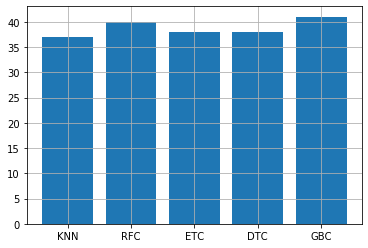

In [140]:
plt.grid()
plt.bar(score_di.keys(), score_di.values())

In [54]:
list(score_di.keys())

['KNN', 'RFC', 'ETC', 'DTC', 'GBC']

In [141]:
test = pd.read_csv('D:/Data-Analysis/Mothers Day/dataset/test.csv')

In [142]:
test.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [143]:
test_tweets = np.array(test['original_text'])
test_tweets

array(['3. Yeah, I once cooked potatoes when I was 3 years old, and by that I mean I threw a bag of spuds into the toilet. " Happy mothers day , I made breakfast!" 66. That time I thought I was cool by drawing the naked lady dachshund on the overhead projector in psychology class. 8',
       "Happy Mother's Day to all the mums, step-mums, grandmothers and dads that cover both parental roles. #mothersday #MotheringSunday https:// twitter.com/SoapandGlory/s tatus/1241731092413132800 …",
       "I love the people from the UK, however, when I awoke and saw #MothersDay trending, it woke this American up immediately. Happy Mother's Day to all of you Mums across the way! God Bless you, the love you share, and the sacrifices you make!",
       ...,
       'Despite all this bullshit today has been one of my favourite days in a lonnng time!! We danced, had donuts, took photos, had a drive in daphne, had a Chinese and did a quiz! Happy Mother’s Day! #fuckcovid19 #mothersday #family',
       'Happ

In [144]:
cleaned_test_tweets = [text_cleaning(tweet) for tweet in test_tweets]

In [157]:
cleaned_test_tweets

[['3',
  'Yeah',
  'I',
  'cooked',
  'potatoes',
  'I',
  '3',
  'years',
  'old',
  'I',
  'mean',
  'I',
  'threw',
  'bag',
  'spuds',
  'toilet',
  'Happy',
  'mothers',
  'day',
  'I',
  'made',
  'breakfast',
  '66',
  'That',
  'time',
  'I',
  'thought',
  'I',
  'cool',
  'drawing',
  'naked',
  'lady',
  'dachshund',
  'overhead',
  'projector',
  'psychology',
  'class',
  '8'],
 ['Happy',
  'Mother',
  'Day',
  'mums',
  'step',
  'mums',
  'grandmothers',
  'dads',
  'cover',
  'parental',
  'roles',
  'mothersday',
  'MotheringSunday',
  'twitter',
  'com',
  'SoapandGlory',
  'tatus',
  '1241731092413132800'],
 ['I',
  'love',
  'people',
  'UK',
  'however',
  'I',
  'awoke',
  'saw',
  'MothersDay',
  'trending',
  'woke',
  'American',
  'immediately',
  'Happy',
  'Mother',
  'Day',
  'Mums',
  'across',
  'way',
  'God',
  'Bless',
  'love',
  'share',
  'sacrifices',
  'make'],
 ['Happy',
  '81st',
  'Birthday',
  'Happy',
  'Mother',
  'Day',
  'mum',
  'see',
  

In [145]:
tokenizer.fit_on_texts(cleaned_test_tweets)
sequences_test = tokenizer.texts_to_sequences(test_tweets)

print('Found %s unique tokens.' % len(tokenizer.word_index))

Found 14939 unique tokens.


In [146]:
test_data_org = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

In [147]:
test_data_org

array([[    0,     0,     0, ...,  3864,  2484,   927],
       [    0,     0,     0, ...,   207,   699, 11845],
       [    0,     0,     0, ...,   346,    17,    73],
       ...,
       [    0,     0,     0, ..., 10424,     5,    28],
       [    0,     0,     0, ..., 14937,     9, 14938],
       [    0,     0,     0, ...,   590,    56,    31]])

In [148]:
embeddings_index = {}
f = test_tweets
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
#

print('Found %s word vectors.' % len(embeddings_index))

Found 312 word vectors.


In [149]:
length = []
for x in test_tweets:
    length.append(len(x.split()))
max(length)

62

In [150]:
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 312 word vectors.


In [151]:
gbc_pred = gbc.predict(test_data_org)

In [152]:
pred_lab =gbc.predict(test_data_org)

In [153]:
print(pred_lab)

[0 0 0 ... 1 0 0]


In [154]:
for i in range(len(pred_lab)):
    if pred_lab[i] == 2:
        pred_lab[i]=-1

In [155]:
pred_lab

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [156]:
import csv
with open('Mothers1_ans.csv', 'w+', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "sentiment_class"])
    for i in range(len(test['id'])):
        writer.writerow([test['id'][i], pred_lab[i]])